In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
import pdb
from Patch_ana import patch_pip
import seaborn as sns
plt.style.use('classic')

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_pre_2Hz_reci = data[(data['Ptl_note']=='E_I_preonly_low')&(data['Reci']==1)]
# data_pre_2Hz_uni = data[(data['Ptl_note']=='E_I_preonly_low')&(data['Reci']==0)]

In [4]:
data_pre_2Hz_reci.drop(112, axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
data_pre_2Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
107,2017071401,31,2,1,1,0,1,"47,48,49","51,52",14,0,"Small, weak LTD",E_I_preonly_low
108,2017071902,28,2,1,1,0,1,"5,6,7","9,10,11",14,17,"Huge amp, strong LTD",E_I_preonly_low
109,2017071903,29,1,1,1,0,1,"13,14,15,16,17","19,20,21,22,23",14,4,"Small amp, weak LTD",E_I_preonly_low
110,2017071903,29,2,1,1,0,1,"13,14,15,16,17","19,20,21,22,23",14,0,"Smal amp, weak LTD",E_I_preonly_low
111,2017080401,27,2,1,1,0,1,"5,6","8,9,10,11",14,4,NaN,E_I_preonly_low
113,2017072102,30,3,1,1,0,1,"12,13,14","16,17,18,19,20",14,0,WeakLTD,E_I_preonly_low


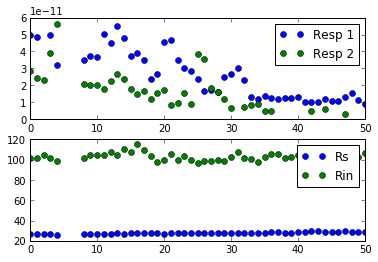

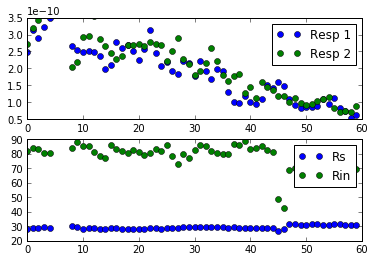

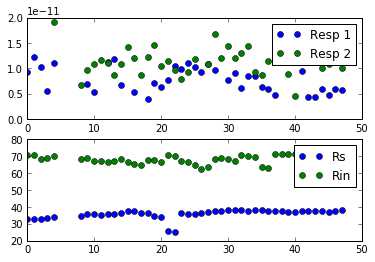

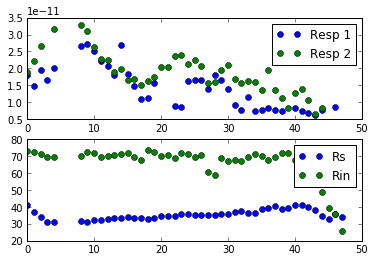

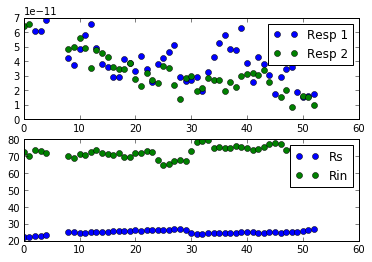

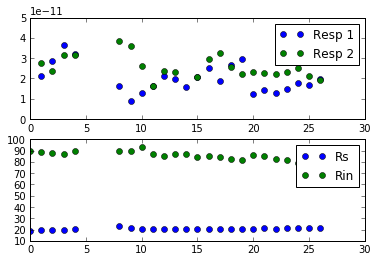

In [6]:
# patch_pip.df_ana(data_pre_2Hz_reci,'data_pre_2Hz_reci', end_ana = [30,30,45,30,40,25])
patch_pip.df_ana(data_pre_2Hz_reci,'data_pre_2Hz_reci')
pre_2Hz_reci = pd.read_pickle('data_pre_2Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(pre_2Hz_reci)

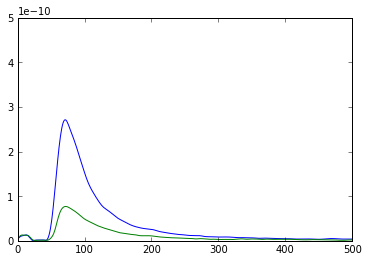

In [7]:
sample_id = 108
plt.plot(np.nanmean(np.vstack(pre_2Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(pre_2Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 5e-10])
with PdfPages('/data/Figure1A_2.pdf') as pdf:
    pdf.savefig()

<Container object of 3 artists>

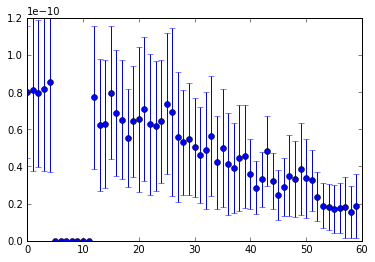

In [8]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
elimi = np.array([30,30,25,30,40,25])
elimi_sr = pd.Series(elimi, index=pre_2Hz_reci.index)
pre_2Hz_reci['elimi']=elimi_sr

In [10]:
pre_2Hz_reci.to_pickle('/data/ana_pre_2Hz_reci')